# Part 1: EDA and Preparation on our Data

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import normalized_mutual_info_score
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

# makes matplotlib plots interactive
#%matplotlib widget
# makes plots show up without calling plt.show()
%matplotlib inline

## Notes 
Our target column (the one we want to predict) is “LOAN_DEFAULT.”
Other columns that can be inputs to our machine learning algorithms are defined in the file “Data Dictionary.xlsx”. Since the data is from India, the currency denomination is Indian Rupees.

Primary and secondary accounts are other loans that the lender took out before the current loan was entered into the dataset; some of the values for these loans are 0 in the dataset.

The size of the loan is the “DISBURSED_AMOUNT” column.

EMI amounts are borrowers’ monthly payments.

## 1. Load the data 

In [2]:
loans=pd.read_csv('loan_data.csv')

In [3]:
# because there are so many columns, we transpose the DataFrame (.T)
loans.head().T

,0,1,2,3,4
UNIQUEID,587200,479470,448682,534325,469385
DISBURSED_AMOUNT,65607,55259,50503,63513,42794
ASSET_COST,78500,63439,66456,72500,60321
LTV,85.0,89.85,78.55,88.69,72.94
BRANCH_ID,2,19,162,2,67
SUPPLIER_ID,22998,21435,17094,22070,18129
MANUFACTURER_ID,86,86,86,86,45
CURRENT_PINCODE_ID,1653,1842,1833,1655,1515
DATE_OF_BIRTH,23-05-1993,06-07-1984,10-05-1997,01-08-1992,13-07-1991
EMPLOYMENT_TYPE,Self employed,Salaried,Salaried,Salaried,Self employed


In [4]:
# it's always good to look at the beginning and end of the data to ensure there are no problems
loans.tail().T

,133149,133150,133151,133152,133153
UNIQUEID,601135,616543,440372,523967,484491
DISBURSED_AMOUNT,43929,61283,48349,44143,57142
ASSET_COST,74400,74830,68790,56100,68395
LTV,61.83,84.19,72.68,84.99,84.99
BRANCH_ID,10,18,9,85,2
SUPPLIER_ID,16291,14878,22888,17138,15529
MANUFACTURER_ID,49,45,49,45,45
CURRENT_PINCODE_ID,5676,2719,5443,1964,1724
DATE_OF_BIRTH,02-01-1990,10-10-1989,24-10-1960,01-06-1980,01-06-1965
EMPLOYMENT_TYPE,Self employed,Self employed,Self employed,Salaried,Salaried


In [5]:
# examine number of rows and columns
loans.shape

(133154, 41)

In [6]:
# check datatypes and null values
print(loans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133154 entries, 0 to 133153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             133154 non-null  int64  
 1   DISBURSED_AMOUNT                     133154 non-null  int64  
 2   ASSET_COST                           133154 non-null  int64  
 3   LTV                                  133154 non-null  float64
 4   BRANCH_ID                            133154 non-null  int64  
 5   SUPPLIER_ID                          133154 non-null  int64  
 6   MANUFACTURER_ID                      133154 non-null  int64  
 7   CURRENT_PINCODE_ID                   133154 non-null  int64  
 8   DATE_OF_BIRTH                        133154 non-null  object 
 9   EMPLOYMENT_TYPE                      128773 non-null  object 
 10  DISBURSAL_DATE                       133154 non-null  object 
 11  STATE_ID     

DISBURSAL_DATE and DATE_OF_BIRTH columns should be dates, but are not.  We can load them as dates using a few arguments from pd.read_csv.

In [7]:
# the infer_datetime_format can help parse the dates faster and easier
# we can also supply the exact format if we convert the columns manually
loans = pd.read_csv('loan_data.csv', parse_dates=['DATE_OF_BIRTH', 'DISBURSAL_DATE'], infer_datetime_format=True)
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133154 entries, 0 to 133153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UNIQUEID                             133154 non-null  int64         
 1   DISBURSED_AMOUNT                     133154 non-null  int64         
 2   ASSET_COST                           133154 non-null  int64         
 3   LTV                                  133154 non-null  float64       
 4   BRANCH_ID                            133154 non-null  int64         
 5   SUPPLIER_ID                          133154 non-null  int64         
 6   MANUFACTURER_ID                      133154 non-null  int64         
 7   CURRENT_PINCODE_ID                   133154 non-null  int64         
 8   DATE_OF_BIRTH                        133154 non-null  datetime64[ns]
 9   EMPLOYMENT_TYPE                      128773 non-null  object        
 

In [8]:
# change column names to lowercase
loans.columns = loans.columns.str.lower()
loans.head().T

,0,1,2,3,4
uniqueid,587200,479470,448682,534325,469385
disbursed_amount,65607,55259,50503,63513,42794
asset_cost,78500,63439,66456,72500,60321
ltv,85.0,89.85,78.55,88.69,72.94
branch_id,2,19,162,2,67
supplier_id,22998,21435,17094,22070,18129
manufacturer_id,86,86,86,86,45
current_pincode_id,1653,1842,1833,1655,1515
date_of_birth,1993-05-23 00:00:00,1984-07-06 00:00:00,1997-05-10 00:00:00,1992-08-01 00:00:00,1991-07-13 00:00:00
employment_type,Self employed,Salaried,Salaried,Salaried,Self employed


In [9]:
#Summary statistics
print(loans.describe().T)

                                        count           mean           std  \
uniqueid                             133154.0  535936.024828  6.838153e+04   
disbursed_amount                     133154.0   54351.551962  1.261641e+04   
asset_cost                           133154.0   75853.326922  1.842757e+04   
ltv                                  133154.0      74.750356  1.146600e+01   
branch_id                            133154.0      72.701015  6.975368e+01   
supplier_id                          133154.0   19634.078886  3.491479e+03   
manufacturer_id                      133154.0      69.036679  2.213404e+01   
current_pincode_id                   133154.0    3395.411223  2.235512e+03   
state_id                             133154.0       7.269012  4.488133e+00   
employee_code_id                     133154.0    1550.299998  9.743029e+02   
mobileno_avl_flag                    133154.0       1.000000  0.000000e+00   
aadhar_flag                          133154.0       0.839825  3.

## 2. EDA using Pandas Profiling

In [10]:
profile = ProfileReport(loans, title='Loans EDA', minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 3. Observations from EDA and Pandas Profiling
Things to look for:
- scan for missing values (including placeholders like 0s, -999, -1, etc)
- look for columns with lots of 0s
- look for columns with little variation
- look for 'unique' columns
- note anything else interesting and columns to feature engineer

### 3.1 *employment_type* has missing values, around 3.3%, which is a small percentage so we can replace these missing values using imputation with mode or KNN imputation


In [11]:
loans['employment_type'].isnull().sum()

4381

In [12]:
mode =loans['employment_type'].mode()[0]
loans['employment_type'].fillna(mode, inplace =True)

In [13]:
loans['employment_type'].isnull().sum()

0

### 3.2 *perform_cns_score* and many other columns have 0s for missing values instead of it being NaN or empty
We can see the SEC (secondary accounts, where the lendee is a cosigner on loan accounts) have a very low correlation to the target.  This is basically what we expected based on the large fraction of 0's for these colunms. Consequently, we will drop all these columns with SEC from our dataset.

The CNS score (credit score) seems to have somewhat of a correlation with the target.  A higher credit score means lower probability of default.

Columns with little variation can show up as lots of zeros
If the fraction of 0s is very high (over 90% or 95%), we can ignore/drop that column. 
We can check the correlation to loan_default to be sure it isn't predictive, but if 99% of a column is 0, then it likely isn't very informative.

A few of the binary columns have almost all 0s:
* driving_flag
* passport_flag
* all columns starting with sec

Check if they have any correlation to the target first before dropping, just to be thorough.


### 3.3 Another column with little variation is *mobileno_avil_flag*, which are all 1. This means everyone in the dataset has a mobile phone. Drop this column as well since it provides no substantial information for our modeling and data understanding.

### 3.4 *uniqueid* is an id for each row, but not useful for machine learning. 

### 3.5 The *current_pincode_id* column is the customer's PIN code, which probably is not related to the target.  We will probably drop that column.

To reduce dimensions of the data, we can group categories that aren't in large numbers from categorical columns.  For example, 5 manufacter brands have 1% or less of the data covered, so these could be grouped into 'other'.

The two CNS columns are probably linearly related, so we probably only need one (the numerical one should have more information).  We should check the correlation between these two columns.


In [14]:
loans.drop(['uniqueid', 'current_pincode_id', 'mobileno_avl_flag'], axis=1, inplace=True)

### 3.6 Convert the columns *average_acct_age* and *credit_history_length* into numerical values of months.

Create the customer's age at the time of loan disbursal by taking the loan disbursal date and subtracting their birthdate.

If we had more data, we could also create a column for the month of the year the loan was given from the disbursal date.  But it looks like the data spans less than a year, and we don't have a very uniform distribution of loans over the months of the year as well.

We could imagine there may be some information in the time of year loans are taken out


In [35]:
# create new column age from date_of_birth
loans['age']= pd.to_numeric(loans['disbursal_date'].dt.year - loans['date_of_birth'].dt.year)
loans.head().T

,0,1,2,3,4
disbursed_amount,65607,55259,50503,63513,42794
asset_cost,78500,63439,66456,72500,60321
ltv,85.0,89.85,78.55,88.69,72.94
branch_id,2,19,162,2,67
supplier_id,22998,21435,17094,22070,18129
date_of_birth,1993-05-23 00:00:00,1984-07-06 00:00:00,1997-05-10 00:00:00,1992-08-01 00:00:00,1991-07-13 00:00:00
employment_type,Self employed,Salaried,Salaried,Salaried,Self employed
disbursal_date,2018-10-18 00:00:00,2018-08-30 00:00:00,2018-08-18 00:00:00,2018-09-25 00:00:00,2018-08-28 00:00:00
state_id,4,4,4,4,6
employee_code_id,2186,596,3127,100,394


In [16]:
# parse average_acct_age and credit_history_length
loans['average_acct_age'] = loans['average_acct_age'].str.replace('\D+', ' ').str.split()
loans['credit_history_length'] = loans['credit_history_length'].str.replace('\D+', ' ').str.split()

for r in range(len(loans)):
    loans['average_acct_age'][r] = pd.to_numeric(loans['average_acct_age'][r][0])*12 + pd.to_numeric(loans['average_acct_age'][r][1])
    loans['credit_history_length'][r] = pd.to_numeric(loans['credit_history_length'][r][0])*12 + pd.to_numeric(loans['credit_history_length'][r][1])

In [17]:
loans.tail().T

,133149,133150,133151,133152,133153
disbursed_amount,43929,61283,48349,44143,57142
asset_cost,74400,74830,68790,56100,68395
ltv,61.83,84.19,72.68,84.99,84.99
branch_id,10,18,9,85,2
supplier_id,16291,14878,22888,17138,15529
manufacturer_id,49,45,49,45,45
date_of_birth,1990-01-02 00:00:00,1989-10-10 00:00:00,1960-10-24 00:00:00,1980-06-01 00:00:00,1965-06-01 00:00:00
employment_type,Self employed,Self employed,Self employed,Salaried,Salaried
disbursal_date,2018-10-22 00:00:00,2018-10-25 00:00:00,2018-08-16 00:00:00,2018-09-20 00:00:00,2018-08-31 00:00:00
state_id,3,4,3,4,4


## 4. Feature Importance and Engineering
Use risk ratio (odds ratio) for binary variables to see if they have any relationship to our target (if they can be used to predict loan defaults).

Then we'll look at Pearson correlations between features and the target.

First, we notice the overall default rate is around 29%.

In [18]:
# calculate overall default rate
loans['loan_default'].mean()

0.2879748261411599

### 4.1 Risk ratio

In [19]:
# define function to find relationship between our target variable, LOAN_DEFAULT, and features using risk ratios/odds ratio
def calculate_risk_ratio(df, column):
    """
    Calclates risk/odds ratio for two classes for a column using a DataFrame.
    """
    print(f'risk ratio for {column}')
    
    if column == 'employment_type':
        print('risk ratio of Self employed to Salaried:')
        self_employed = loans[loans['employment_type'] == 'Self employed']['loan_default'].mean()
        salaried = loans[loans['employment_type'] == 'Salaried']['loan_default'].mean()
        print(self_employed / salaried)
        return

    # for columns with 0s and 1s
    print('risk ratio of class 1 to class 0:')
    class1 = loans[loans[column] == 1]['loan_default'].mean()
    class2 = loans[loans[column] == 0]['loan_default'].mean()
    print(class1 / class2)


In [20]:
binary_variables = ['employment_type', 'aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag', 'passport_flag']

for var in binary_variables:
    calculate_risk_ratio(loans, var)
    print('\n')

risk ratio for employment_type
risk ratio of Self employed to Salaried:
2.3518230617798643


risk ratio for aadhar_flag
risk ratio of class 1 to class 0:
0.8108288592477838


risk ratio for pan_flag
risk ratio of class 1 to class 0:
0.9901223499906509


risk ratio for voterid_flag
risk ratio of class 1 to class 0:
1.244772642045135


risk ratio for driving_flag
risk ratio of class 1 to class 0:
0.9616915995827973


risk ratio for passport_flag
risk ratio of class 1 to class 0:
0.933344291128962




It looks like the only variable that doesn't have much difference between the classes is **pan_flag**, so we will drop that variable.  Even though other **flag** variables are highly skewed, we'll keep them for now.

**employment_type** looks like it will be useful.

### 4.2 Correlation between numerical and our target variable using point biserial correlation

In [21]:
pri_columns = [c for c in loans.columns if c[:3] == 'pri']
sec_columns = [c for c in loans.columns if c[:3] == 'sec']
numeric_columns = ['disbursed_amount', 'asset_cost', 'ltv', 'perform_cns_score', 'new_accts_in_last_six_months',
                   'delinquent_accts_in_last_six_months', 'no_of_inquiries'] + pri_columns + sec_columns
categorical_columns = ['branch_id', 'supplier_id', 'manufacturer_id', 'state_id', 'employee_code_id',
                       'perform_cns_score_description']

In [22]:
# uses pearson correlation - values are the same as point biserial correlation, which is for a binary target
loans[['loan_default'] + numeric_columns].corr()

,loan_default,disbursed_amount,asset_cost,ltv,perform_cns_score,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,no_of_inquiries,pri_no_of_accts,pri_active_accts,...,pri_sanctioned_amount,pri_disbursed_amount,primary_instal_amt,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,sec_instal_amt
loan_default,1.000000,0.082687,0.035267,0.075647,-0.261609,-0.094088,0.020883,-0.000180,-0.089170,-0.104304,...,-0.014237,-0.013943,-0.012018,-0.009715,-0.009260,-0.005873,-0.005351,-0.005735,-0.005625,-0.004786
disbursed_amount,0.082687,1.000000,0.738439,0.388480,0.009327,0.035043,0.019619,0.038820,0.034649,0.039761,...,0.005329,0.005471,0.001243,-0.015899,-0.015721,-0.008804,-0.004040,-0.005711,-0.005639,-0.006924
asset_cost,0.035267,0.738439,1.000000,-0.309074,-0.050700,-0.021803,-0.007370,-0.019480,-0.027164,-0.023554,...,0.000232,0.000214,-0.004491,-0.022230,-0.021730,-0.014789,-0.009012,-0.011652,-0.011523,-0.005398
ltv,0.075647,0.388480,-0.309074,1.000000,0.084029,0.080516,0.039062,0.087298,0.085303,0.088612,...,0.006935,0.007131,0.005336,0.011300,0.010877,0.010678,0.007893,0.009420,0.009315,-0.001590
perform_cns_score,-0.261609,0.009327,-0.050700,0.084029,1.000000,0.346006,0.164339,0.150285,0.432130,0.479666,...,0.065896,0.065344,0.065557,0.054293,0.046345,0.034945,0.017307,0.021341,0.020980,0.016358
new_accts_in_last_six_months,-0.094088,0.035043,-0.021803,0.080516,0.346006,1.000000,0.183557,0.264050,0.543773,0.706533,...,0.068733,0.068451,0.128492,0.124742,0.140456,0.061447,0.051766,0.064133,0.063085,0.027894
delinquent_accts_in_last_six_months,0.020883,0.019619,-0.007370,0.039062,0.164339,0.183557,1.000000,0.070134,0.314821,0.391965,...,0.103042,0.104011,0.079354,0.098983,0.104008,0.100801,0.036859,0.048719,0.047938,0.017311
no_of_inquiries,-0.000180,0.038820,-0.019480,0.087298,0.150285,0.264050,0.070134,1.000000,0.185573,0.200701,...,0.009242,0.009370,0.010410,0.005632,0.004478,0.006216,0.003827,0.003890,0.003827,0.003437
pri_no_of_accts,-0.089170,0.034649,-0.027164,0.085303,0.432130,0.543773,0.314821,0.185573,1.000000,0.764587,...,0.124013,0.123723,0.259805,0.053168,0.042328,0.028933,0.020583,0.024812,0.024447,0.021016
pri_active_accts,-0.104304,0.039761,-0.023554,0.088612,0.479666,0.706533,0.391965,0.200701,0.764587,1.000000,...,0.165332,0.164915,0.180363,0.061251,0.051595,0.034737,0.018628,0.023819,0.023254,0.021173


We can see that **SEC** columns (secondary accounts, where the lendee is a cosigner on loan accounts) have a very low correlation to the target.  This is basically what we expected based on the large fraction of 0's for these colunms. Consequently, we will drop all these columns with SEC from our dataset.

**perform_cns_score** (credit score) seems to have somewhat of a correlation with the target.  A higher credit score means lower probability of default.

In [23]:
loans.drop(sec_columns, inplace=True, axis=1)

In [24]:
# Pearson correlation on categorical columns
loans[['loan_default'] + categorical_columns].corr()

,loan_default,branch_id,supplier_id,manufacturer_id,state_id,employee_code_id
loan_default,1.000000,0.020020,0.045199,-0.031501,0.021998,0.020768
branch_id,0.020020,1.000000,0.226413,-0.050389,0.186630,0.089699
supplier_id,0.045199,0.226413,1.000000,-0.065423,0.104809,0.097546
manufacturer_id,-0.031501,-0.050389,-0.065423,1.000000,0.025501,-0.045170
state_id,0.021998,0.186630,0.104809,0.025501,1.000000,0.118709
employee_code_id,0.020768,0.089699,0.097546,-0.045170,0.118709,1.000000


In [25]:
# for some reason it won't show the CNS score description in the table above
normalized_mutual_info_score(loans['perform_cns_score_description'], loans['loan_default'])

0.03974666702754438

**manufacturer_id** looks like it has low importance.  Also state id and branch id are on the low end.  We'll ignore **manufacturer_id** for now, and keep an eye out for **state_id** and **branch_id** when we look at feature importances from random forests.

In [26]:
loans.drop(['manufacturer_id'], inplace=True, axis=1)

It appears the **perform_cns_score_description** and **perform_cns_score** don't fully explain each other. The description should just be a binning of the CNS score, but apparantly it is not.

In [27]:
normalized_mutual_info_score(loans['perform_cns_score'], loans['perform_cns_score_description'])

0.7771270407143989

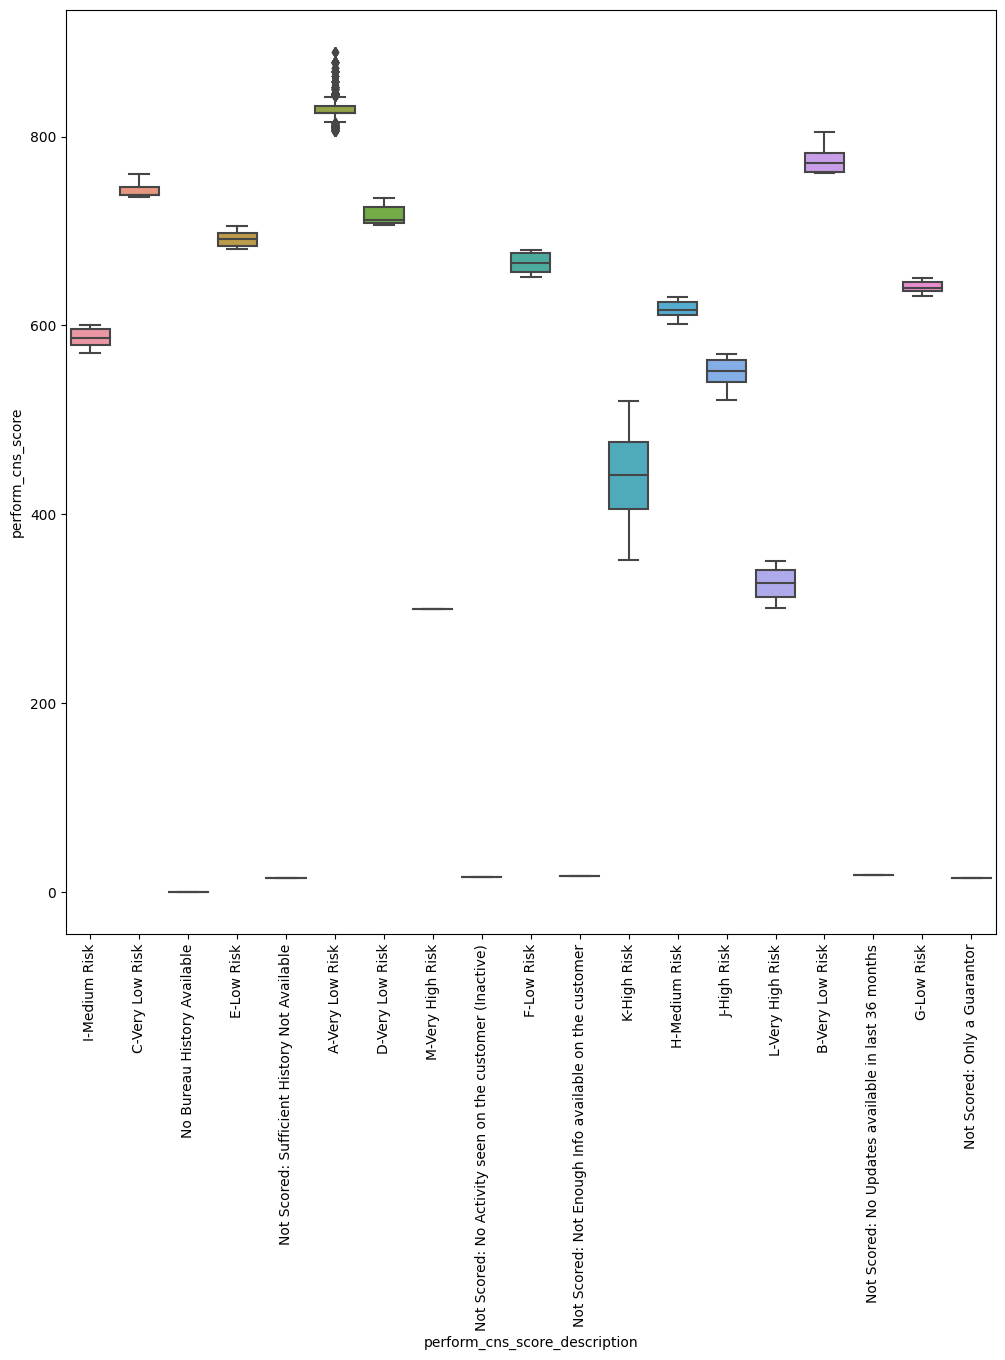

In [28]:
fig = plt.figure(figsize=(12, 12))
chart = sns.boxplot(x='perform_cns_score_description', y='perform_cns_score', data=loans)
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

**perform_cns_score** and **perfrom_csn_score_description** are highly related (description is just a binning of CNS score except for 0 values).  However, the mutual information score for the CNS description is the highest of all categorical values, and the normalized mutual info score between **perform_cns_score** and **perfrom_csn_score_description** is not perfectly 1.  So we'll keep it.

### 4.3 Summary
**Columns Dropped:**
- manufacturer_id
- uniqueid
- current_pincode_id
- mobileno_avl_flag
- All columns starting with "sec"

**Columns Imputed:**
- employment_type with the mode, "self_employed"

**Columns changed to DateTime dtype:**
- date_of_birth
- disbursal_date

**Columns Transformed:**
- average_acct_age
- credit_history_length

**Columns Added:**
- age 

In [29]:
# one last check of the data
loans.head().T

,0,1,2,3,4
disbursed_amount,65607,55259,50503,63513,42794
asset_cost,78500,63439,66456,72500,60321
ltv,85.0,89.85,78.55,88.69,72.94
branch_id,2,19,162,2,67
supplier_id,22998,21435,17094,22070,18129
date_of_birth,1993-05-23 00:00:00,1984-07-06 00:00:00,1997-05-10 00:00:00,1992-08-01 00:00:00,1991-07-13 00:00:00
employment_type,Self employed,Salaried,Salaried,Salaried,Self employed
disbursal_date,2018-10-18 00:00:00,2018-08-30 00:00:00,2018-08-18 00:00:00,2018-09-25 00:00:00,2018-08-28 00:00:00
state_id,4,4,4,4,6
employee_code_id,2186,596,3127,100,394


In [30]:
# save the cleaned data for use in the next step
loans.to_csv('cleaned_loan_data.csv', index=False)

## 5. Additional Plots

Text(0.5, 1.0, 'Loan Amounts')

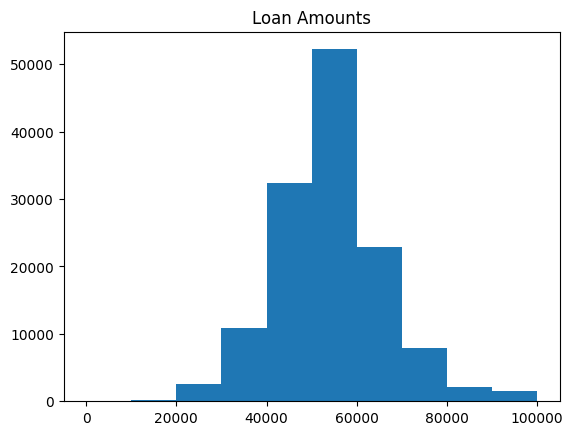

In [31]:
# distribution of loan amount between $0 and $100K
plt.hist('disbursed_amount', data=loans, bins=10, range=(0,100000))
plt.title('Loan Amounts')

Text(0.5, 1.0, 'Spread of Age')

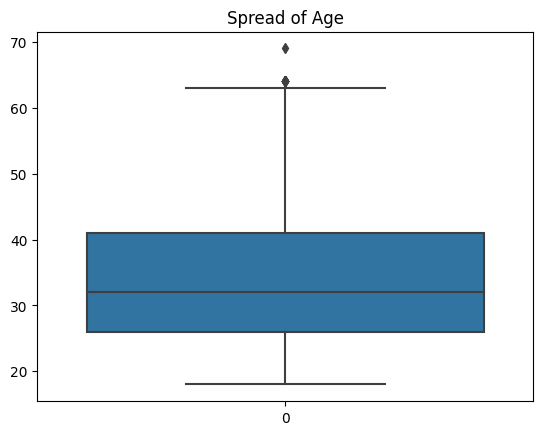

In [41]:
# average age of borrower
sns.boxplot(data=loans['age'])
plt.title('Spread of Age')

Text(0.5, 1.0, 'Defaults by Employment')

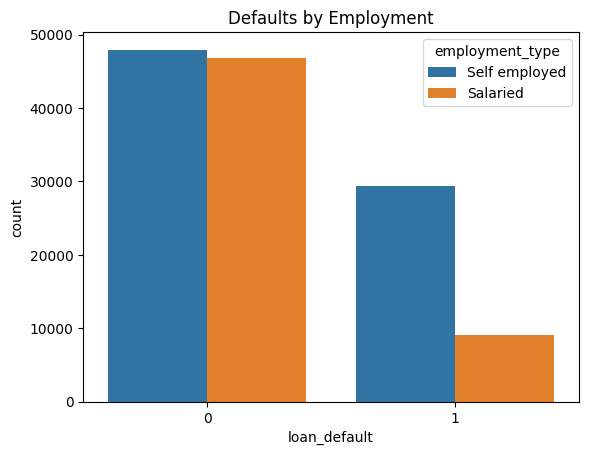

In [42]:
# count of defaults (loan_default=1) by employment
sns.countplot(x='loan_default', hue='employment_type', data=loans)
plt.title('Defaults by Employment')

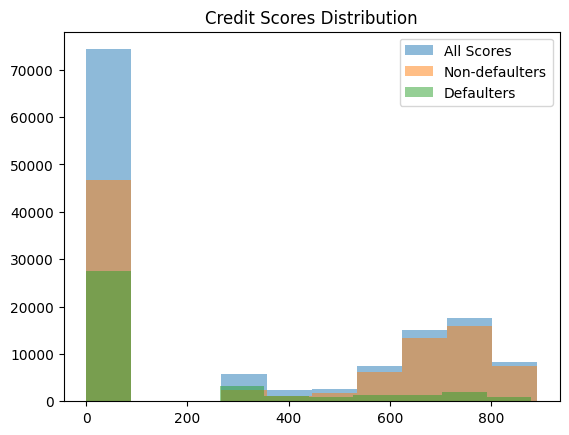

In [43]:
#score distribution for defaulters and nondefaulters
plt.hist('perform_cns_score', data=loans,label='All Scores', alpha=.5)
plt.hist(loans[loans['loan_default']==0]['perform_cns_score'], alpha=.5, label='Non-defaulters')
plt.hist(loans[loans['loan_default']==1]['perform_cns_score'], alpha=.5, label='Defaulters')
plt.title('Credit Scores Distribution')
plt.legend()

Since there are few scores between 100 and 200 and more can be said for defaults related to higher scores, we'll replot the histogram for scores between 200 and 950.

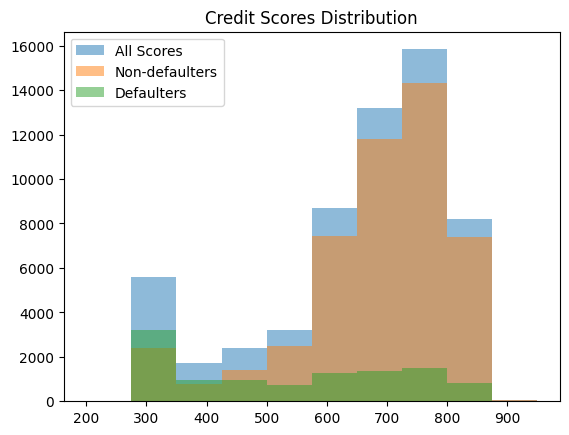

In [44]:
##### score distribution for defaulters and nondefaulters with range between 200 and 950
plt.hist('perform_cns_score', data=loans,label='All Scores', alpha=.5, range=(200, 950))
plt.hist(loans[loans['loan_default']==0]['perform_cns_score'], alpha=.5, range=(200, 950), label='Non-defaulters')
plt.hist(loans[loans['loan_default']==1]['perform_cns_score'], alpha=.5, range=(200, 950),label='Defaulters')
plt.title('Credit Scores Distribution')
plt.legend()